The following jupyter notebook takes an exploratory view of the simulation output for geothermal LCOE of $80 and a Carbon Tax of $40/metric ton of CO2 emitted

In [1]:

#loading in respective imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
sns.set(style="darkgrid")

In [2]:
dfPercent = pd.read_excel("../../modelOutputs/outputEnergyCommitmentCT40GT80.xlsx",sheet_name="percentGeneration")
dfRaw = pd.read_excel("../../modelOutputs/outputEnergyCommitmentCT40GT80.xlsx",sheet_name="rawGeneration")
dfRaw["Gen-load difference"] = np.abs(dfRaw["Gen-load difference"])
dfRaw.head()

,Hour Ending,NG Gas,Coal,Nuclear,Wind,Solar,Geothermal,Generation Sum,ERCOT Load,Gen-load difference
0,0,9164.734766,0,0,34554.262027,0.003208,0.0,43719.0,43719.849616,0.849616
1,1,8014.647344,0,0,35306.346423,0.006233,0.0,43321.0,43321.050347,0.050347
2,2,7924.752153,0,0,35138.240680,0.007167,0.0,43063.0,43063.067063,0.067063
3,3,10360.826241,0,0,32729.170984,0.002775,0.0,43090.0,43090.059203,0.059203
4,4,13237.904298,0,0,30221.814826,26.280876,0.0,43486.0,43486.590073,0.590073


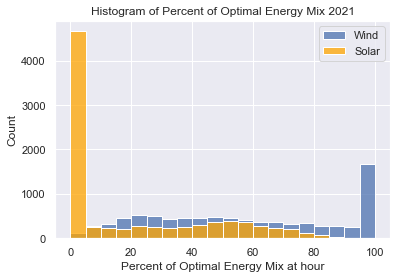

In [3]:
graph = sns.histplot(data=dfPercent*100, x="Wind",binwidth=5,binrange=[0,100])
sns.histplot(data=dfPercent*100, x="Solar",binwidth=5,binrange=[0,100],color="Orange")
graph.set(xlabel = "Percent of Optimal Energy Mix at hour",title="Histogram of Percent of Optimal Energy Mix 2021")
plt.legend(labels=["Wind", "Solar"])

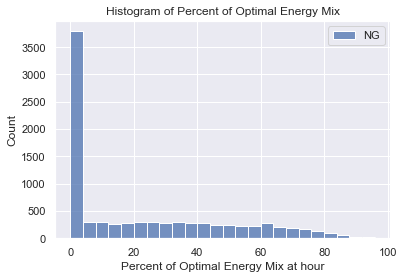

In [4]:
#Looking at Natural Gas histogram
graph = sns.histplot(data=dfPercent*100, x="NG Gas")#,binwidth=5,binrange=[0,100],color="Gray")
graph.set(xlabel = "Percent of Optimal Energy Mix at hour",title="Histogram of Percent of Optimal Energy Mix")
plt.legend(labels=["NG"])

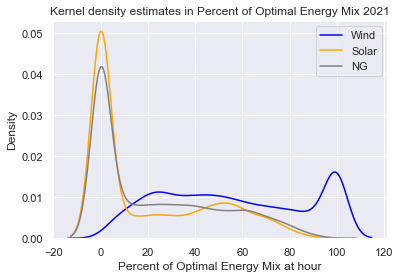

In [5]:
#combining all onto density plot
graph = sns.kdeplot(data=dfPercent*100, x="Wind",color="Blue")
sns.kdeplot(data=dfPercent*100, x="Solar",color="Orange")
sns.kdeplot(data=dfPercent*100, x="NG Gas",color="Gray")
graph.set(xlabel = "Percent of Optimal Energy Mix at hour",title="Kernel density estimates in Percent of Optimal Energy Mix 2021")
plt.legend(labels=["Wind", "Solar", "NG"])

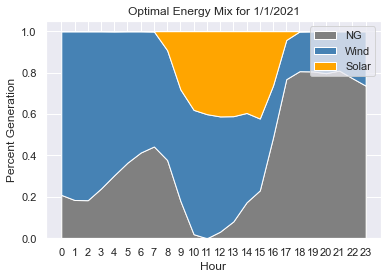

In [6]:
#now looking at raw generation stacked area chart
plt.stackplot(dfPercent["Hour Ending"][0:24], dfPercent["NG Gas"][0:24], dfPercent["Wind"][0:24],dfPercent["Solar"][0:24],dfPercent["Geothermal"][0:24],colors=["Gray","steelblue","Orange","Red"])
newLabels = np.arange(0,24,1)
currentLocs,currentLabels = plt.xticks()
plt.xticks(ticks=currentLocs,labels=newLabels)
plt.xlabel("Hour")
plt.ylabel("Percent Generation")
plt.title("Optimal Energy Mix for 1/1/2021")
plt.legend(labels=["NG","Wind","Solar"])

[Text(0.5, 0, 'Generation - demand (MWh)'),
 Text(0.5, 1.0, 'Histogram of Total generation minus demand')]

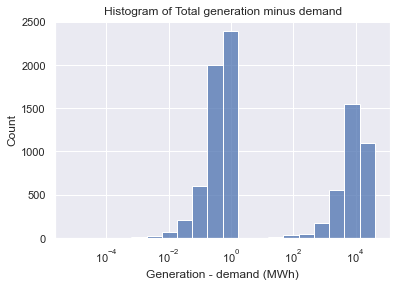

In [7]:
#now looking at where over generation histogram
graph = sns.histplot(data=dfRaw, x="Gen-load difference",bins=20,log_scale=True)
graph.set(xlabel = "Generation - demand (MWh)",title="Histogram of Total generation minus demand")

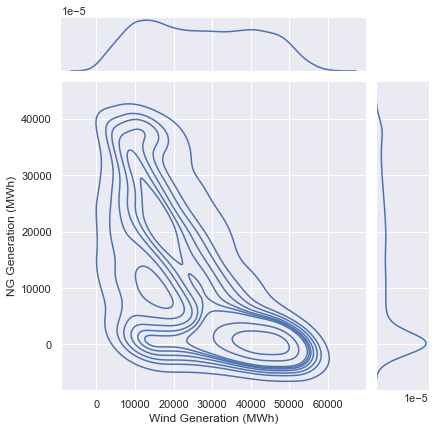

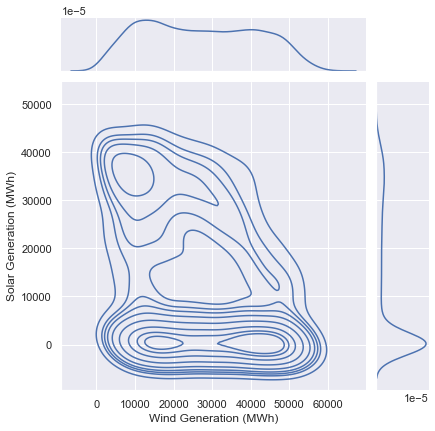

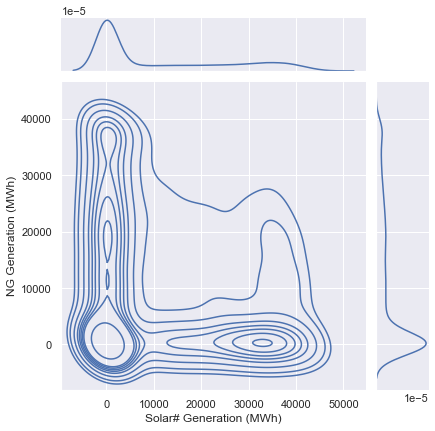

In [8]:
#now looking at joint distributions
graph1 = sns.jointplot(data=dfRaw, x="Wind", y="NG Gas",kind="kde")
graph1.set_axis_labels("Wind Generation (MWh)","NG Generation (MWh)")
#graph1.set(title="Joint Distribution Density Plots of NG and Wind (2021)")
graph2 = sns.jointplot(data=dfRaw, x="Wind", y="Solar",kind="kde")
graph2.set_axis_labels("Wind Generation (MWh)","Solar Generation (MWh)")

graph3 = sns.jointplot(data=dfRaw, x="Solar", y="NG Gas",kind="kde")
graph3.set_axis_labels("Solar# Generation (MWh)","NG Generation (MWh)")
